# GA 를 활용한 함수 최댓값 구하기 (문제)

## 사용할 그래프

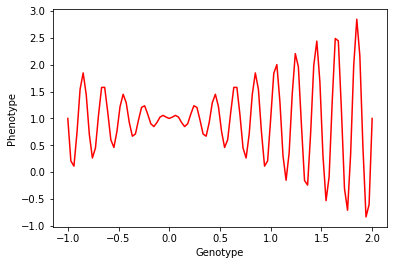

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random 

#초기 그래프
x = np.linspace(-1,2,100)
y = x * np.sin(10 * np.pi * x) + 1.0
y1 = np.sin(x)
plt.xlabel("Genotype")
plt.ylabel("Phenotype")
plt.plot(x,y,"red")
plt.show()

#2.8503->>최댓값


## 초기 개체수 100개의 집단 만들기

In [2]:
#초기 population initialize
def init_pop(gene, pop) :
    initial = []
    for i in range(pop) :
        #chromosome 만들기 
        initial.append(np.random.randint(0,2,size = gene))
    return initial

In [3]:
#개체수 100개, gene 22개 집단 생성
population = init_pop(22,100)
generation = 0

## 2진수 10진수 변환 함수

In [4]:
#2진수 배열을 10진수로 바꾸기
def decoding (chromosome) :
    result = 0
    exp = len(chromosome) - 1
    for i in range(len(chromosome)) :
        result = result + 2**exp * (chromosome[i])
        exp = exp - 1
    
    return result

#10진수 배열을 2진수로 바꾸기
def encoding (chromosome) :
    
    return

## normalize function : 10진수 chromosome 값을 -1과 2 사이 값으로 정규화

In [5]:
#범위 밖의 10진수 값을 -1과 2 사이 값으로 normalize
def normalize(n) :
    n = -1 + 3 * n/(2**22)
    
    return n

## 함수의 x좌표를 구하는 함수

In [6]:
def get_x(chromosome):
    return normalize(decoding(chromosome))

## 적합도 함수

In [7]:
#fitness function 
def fit_func(chromosome) :
    #입력받은 chromosome을 10진수로 변형하고, normalize 시킴
    chromosome = decoding(chromosome)
    chromosome = normalize(chromosome)
    #범위내로 normalized된 chromosome에 함수를 취함
    result = chromosome * np.sin(10 * np.pi * chromosome) + 1.0
    
    return result

## 교차 함수

In [8]:
#c1, c2를 crossover
def crossover(c1, c2) :
    temp_c1 = []
    #교차를 하기 위해 index = 0인 경우는 제외
    index = np.random.randint(1,22)
    #slicing을 이용한 깊은 복사
    temp_c1 = np.concatenate([copy.deepcopy(c1[0:index]), copy.deepcopy(c2[index:23])])
    temp_c2 = np.concatenate([copy.deepcopy(c2[0:index]), copy.deepcopy(c1[index:23])])
    return temp_c1,temp_c2

## 돌연변이 함수

In [9]:
#mutation
def mutation(chromosome) :
    #0에서 21까지 변이를 일으킬 랜덤한 유전자를 선택
    gene = np.random.randint(0,22)
    #유전자 0과 1 바꿈
    if chromosome[gene] :
        chromosome[gene] = 0
    else :
        chromosome[gene] = 1
    print(str(gene)+"번째 유전자에서 돌연변이 발생")

In [10]:
print(population[0])
print(mutation(population[0]))

[1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1]
10번째 유전자에서 돌연변이 발생
None


## 룰렛 휠 선택

In [11]:
#Roulette wheel selection
def R_W_select(population):
    #population에 대한 fitness 값(양수여야 하기 때문에 실제 값에 1을 더해줌)
    data = []
    #population에 100개의 chromosome에 fitness function을 적용시킨다
    for i in population:
        #룰렛 휠 선택을 하기 위해 data에 1을 더해 양수값만 집어넣는다
        data.append(fit_func(i) + 1)
        
    #룰렛 휠에 사용할 랜덤 변수 2개 만들기
    randNum_1 = 0
    randNum_2 = 0
       #중복 확인
    while randNum_1 == randNum_2:
        randNum_1 = np.random.randint(0,np.sum(data))
        randNum_2 = np.random.randint(0,np.sum(data))

    fitness_sum = 0
    #data를 sum에 더하면서 기존에 뽑은 랜덤 변수를 넘어갈 때, 그 data에 대한 index를 구함.
    index1 = 0
    index2 = 0
    while index1==index2:
        for i in range(0,len(data)):
            fitness_sum = fitness_sum + data[i]
            if fitness_sum >= randNum_1:
                index1 = i
                break
                
        fitness_sum = 0
                
        for i in range(0,len(data)):
            fitness_sum = fitness_sum + data[i]
            if fitness_sum >= randNum_2:
                index2 = i
                break
    
    #부모 선택(깊은 복사)
    new_ch1 = copy.deepcopy(population[index1])
    new_ch2 = copy.deepcopy(population[index2])
    
    #선택한 부모 2개 반환
    return new_ch1,new_ch2

## 세대 진화

In [12]:
#전 세대 population을 넣어주면 새로운 세대 population을 리턴
def Evolve(population):
    new_population = []
    #10%의 확률로 돌연변이가 일어남
    mut_prob = [1,0,0,0,0,0,0,0,0,0]
    #crossover 한 번당 두 개의 자식이 생기므로 2로 나눠줌
    for i in range(50):
        #룰렛 휠로 부모 선택
        ch1,ch2 = R_W_select(population)
        #선택한 부모로 crossover
        ch1,ch2 = crossover(ch1,ch2)
        #mutation
        if(random.choice(mut_prob)):
            mutation(ch1)
            
        if(random.choice(mut_prob)):
            mutation(ch2)
        
        
        #돌연변이까지 마친 자손 추가
        new_population.append(ch1)
        new_population.append(ch2)
    
    
    #새로운 세대를 가리키게 함(얕은 복사)
    population = new_population
    #세대 증가
    #generation += 1
    return population

## 최댓값 찾기

In [13]:
def find_max_x(population):
    max_index = 0
    for i in range(0,len(population)):
        if fit_func(population[i]) >= fit_func(population[max_index]):
            max_index = i
    return normalize(decoding(population[max_index]))

def find_max_y(population):
    max = 0
    for i in range(0,len(population)):
        if fit_func(population[i]) >= max:
            max = fit_func(population[i])
    return max

## 종료 조건

In [14]:
def is_end(population):
    max_value = find_max_y(population)
    if(max_value >= 2.85):
        return True
    return False

## 0세대 개체

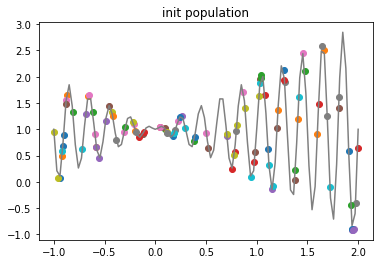

함수의 최댓값을 가지는 x :  1.641493797302246
함수의 최댓값 :  2.5832305851408854


In [15]:
for i in range(len(population)) :
    plt.scatter(get_x(population[i]),fit_func(population[i]))
plt.plot(x,y,"grey")
plt.title("init population")
plt.show()
print("함수의 최댓값을 가지는 x : ", find_max_x(population))
print("함수의 최댓값 : ", find_max_y(population))

# 세대 수를 늘려가며 진화 

8번째 유전자에서 돌연변이 발생
18번째 유전자에서 돌연변이 발생
18번째 유전자에서 돌연변이 발생
20번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생


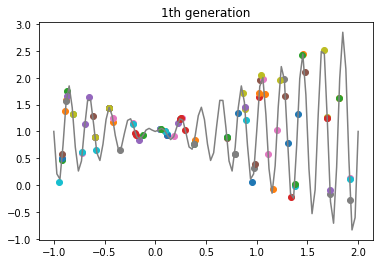

함수의 최댓값을 가지는 x :  1.663374900817871
함수의 최댓값 :  2.51868378854002
1번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
2번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
2번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생


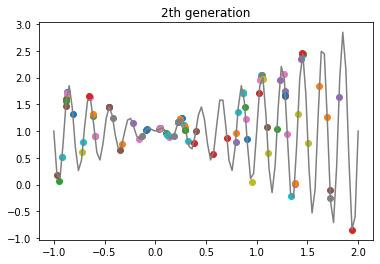

함수의 최댓값을 가지는 x :  1.4498789310455322
함수의 최댓값 :  2.4498684436765332
15번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생
13번째 유전자에서 돌연변이 발생
0번째 유전자에서 돌연변이 발생


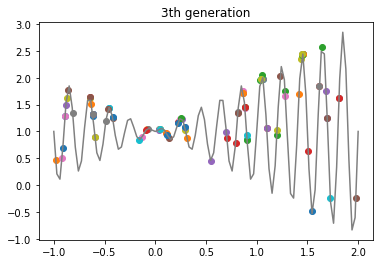

함수의 최댓값을 가지는 x :  1.6412298679351807
함수의 최댓값 :  2.5793282028655655
13번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
18번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
5번째 유전자에서 돌연변이 발생


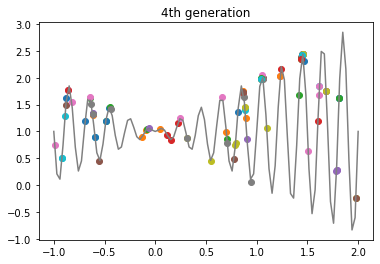

함수의 최댓값을 가지는 x :  1.4507379531860352
함수의 최댓값 :  2.4503481037638
21번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
20번째 유전자에서 돌연변이 발생
2번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생
19번째 유전자에서 돌연변이 발생
19번째 유전자에서 돌연변이 발생
13번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생


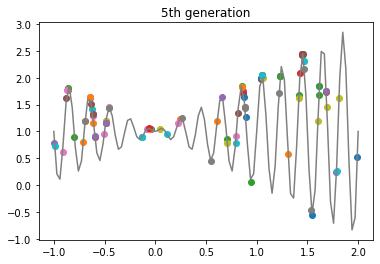

함수의 최댓값을 가지는 x :  1.4507379531860352
함수의 최댓값 :  2.4503481037638
5번째 유전자에서 돌연변이 발생
5번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
14번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생


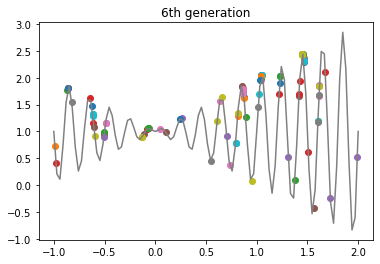

함수의 최댓값을 가지는 x :  1.4507150650024414
함수의 최댓값 :  2.450349028284704
16번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
3번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
18번째 유전자에서 돌연변이 발생
20번째 유전자에서 돌연변이 발생
11번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
5번째 유전자에서 돌연변이 발생
3번째 유전자에서 돌연변이 발생


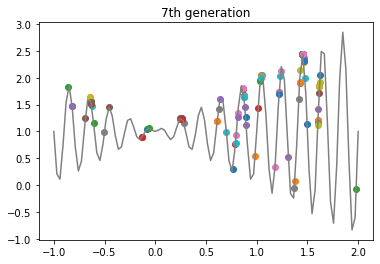

함수의 최댓값을 가지는 x :  1.4507150650024414
함수의 최댓값 :  2.450349028284704
0번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
14번째 유전자에서 돌연변이 발생
19번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생


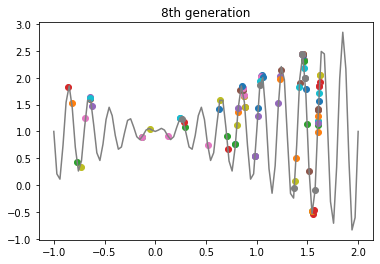

함수의 최댓값을 가지는 x :  1.4506886005401611
함수의 최댓값 :  2.4503491615481456
21번째 유전자에서 돌연변이 발생
2번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
3번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생


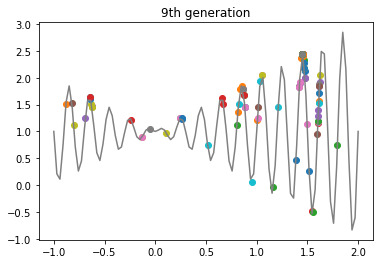

함수의 최댓값을 가지는 x :  1.4506943225860596
함수의 최댓값 :  2.4503492177643147
0번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
19번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
11번째 유전자에서 돌연변이 발생
3번째 유전자에서 돌연변이 발생
14번째 유전자에서 돌연변이 발생
5번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생


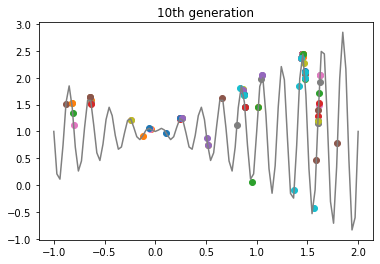

함수의 최댓값을 가지는 x :  1.4506871700286865
함수의 최댓값 :  2.450349140164035
12번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
0번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생
8번째 유전자에서 돌연변이 발생


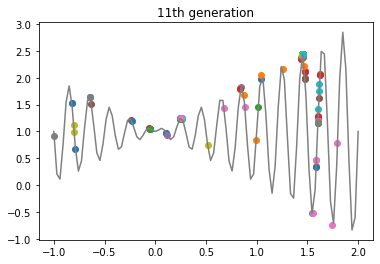

함수의 최댓값을 가지는 x :  1.4506886005401611
함수의 최댓값 :  2.4503491615481456
18번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생
18번째 유전자에서 돌연변이 발생
5번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
5번째 유전자에서 돌연변이 발생


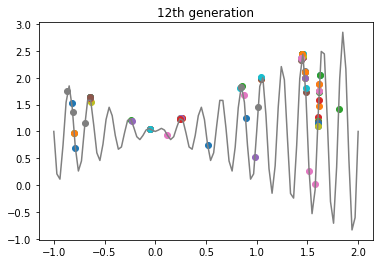

함수의 최댓값을 가지는 x :  1.4507157802581787
함수의 최댓값 :  2.450349010755544
4번째 유전자에서 돌연변이 발생
0번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
13번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생
20번째 유전자에서 돌연변이 발생
8번째 유전자에서 돌연변이 발생
19번째 유전자에서 돌연변이 발생
20번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생


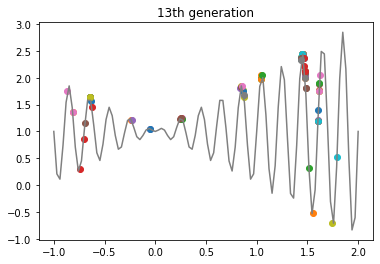

함수의 최댓값을 가지는 x :  1.4507157802581787
함수의 최댓값 :  2.450349010755544
8번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
0번째 유전자에서 돌연변이 발생
14번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생
8번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
8번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
18번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생


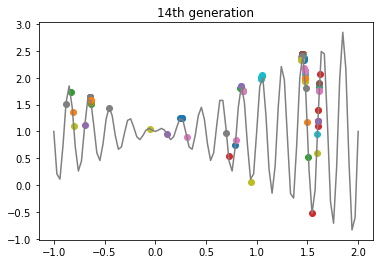

함수의 최댓값을 가지는 x :  1.4507157802581787
함수의 최댓값 :  2.450349010755544
10번째 유전자에서 돌연변이 발생
3번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생
19번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생
0번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생


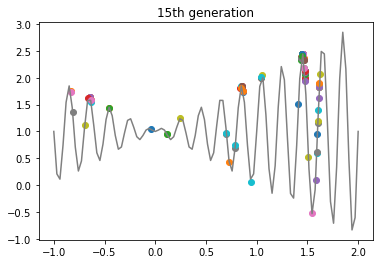

함수의 최댓값을 가지는 x :  1.4514474868774414
함수의 최댓값 :  2.4499470231301403
2번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
5번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
5번째 유전자에서 돌연변이 발생
14번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생
8번째 유전자에서 돌연변이 발생
14번째 유전자에서 돌연변이 발생


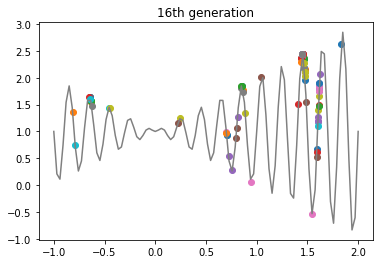

함수의 최댓값을 가지는 x :  1.8350062370300293
함수의 최댓값 :  2.6351657322565516
1번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생


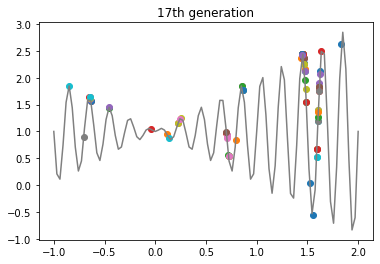

함수의 최댓값을 가지는 x :  1.8349547386169434
함수의 최댓값 :  2.63377045102599
20번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
20번째 유전자에서 돌연변이 발생
18번째 유전자에서 돌연변이 발생
0번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생


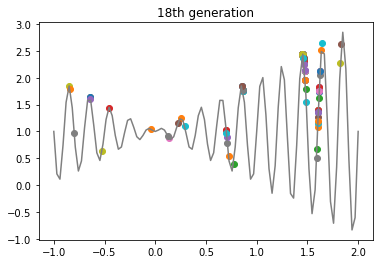

함수의 최댓값을 가지는 x :  1.6474547386169434
함수의 최댓값 :  2.6421907298516647
5번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생
2번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
3번째 유전자에서 돌연변이 발생
2번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생
14번째 유전자에서 돌연변이 발생


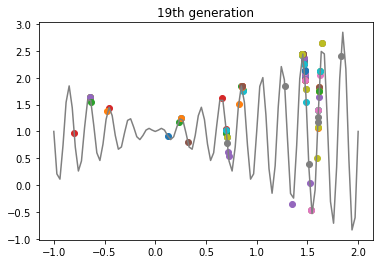

함수의 최댓값을 가지는 x :  1.6474547386169434
함수의 최댓값 :  2.6421907298516647
21번째 유전자에서 돌연변이 발생
2번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
8번째 유전자에서 돌연변이 발생
20번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생


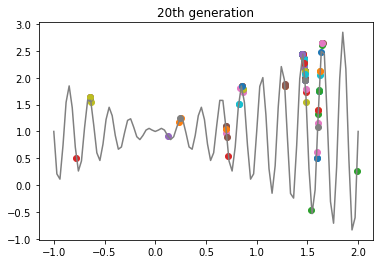

함수의 최댓값을 가지는 x :  1.650733470916748
함수의 최댓값 :  2.6502952498145516
18번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
11번째 유전자에서 돌연변이 발생
0번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생
8번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생
13번째 유전자에서 돌연변이 발생
11번째 유전자에서 돌연변이 발생


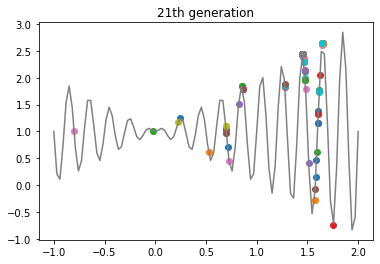

함수의 최댓값을 가지는 x :  1.6507270336151123
함수의 최댓값 :  2.6502964721922506
8번째 유전자에서 돌연변이 발생
20번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
18번째 유전자에서 돌연변이 발생
11번째 유전자에서 돌연변이 발생
18번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
3번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
0번째 유전자에서 돌연변이 발생
11번째 유전자에서 돌연변이 발생


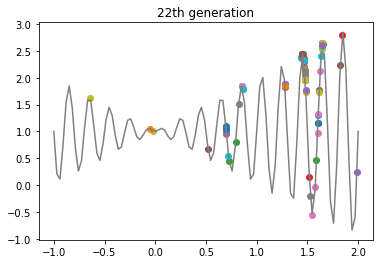

함수의 최댓값을 가지는 x :  1.8422789573669434
함수의 최댓값 :  2.7883469469530184
9번째 유전자에서 돌연변이 발생
8번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생


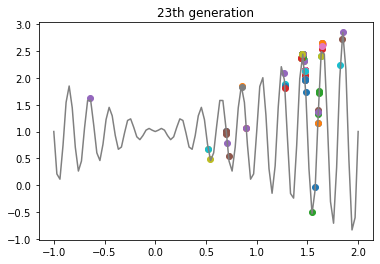

함수의 최댓값을 가지는 x :  1.8493971824645996
함수의 최댓값 :  2.849065548719456
8번째 유전자에서 돌연변이 발생
11번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생
13번째 유전자에서 돌연변이 발생
11번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생


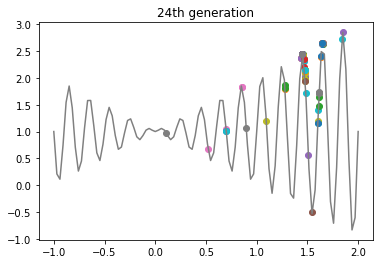

함수의 최댓값을 가지는 x :  1.8496003150939941
함수의 최댓값 :  2.8494545084112337
11번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생
0번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
14번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생


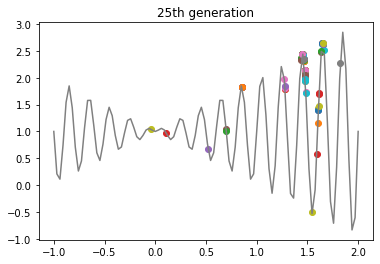

함수의 최댓값을 가지는 x :  1.648169994354248
함수의 최댓값 :  2.6454469357514405
16번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생
8번째 유전자에서 돌연변이 발생
11번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
11번째 유전자에서 돌연변이 발생
20번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
2번째 유전자에서 돌연변이 발생


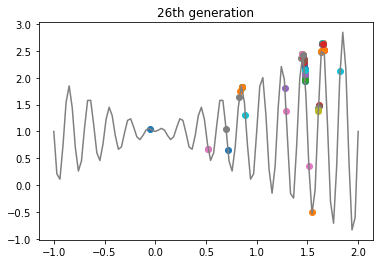

함수의 최댓값을 가지는 x :  1.650733470916748
함수의 최댓값 :  2.6502952498145516
13번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생
13번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
5번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생
2번째 유전자에서 돌연변이 발생
10번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
3번째 유전자에서 돌연변이 발생
2번째 유전자에서 돌연변이 발생


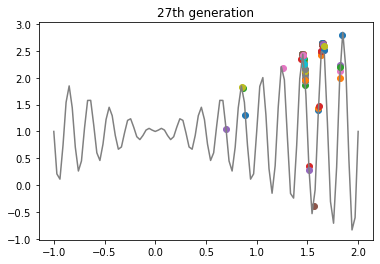

함수의 최댓값을 가지는 x :  1.8423197269439697
함수의 최댓값 :  2.7889518297239206
5번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생
9번째 유전자에서 돌연변이 발생
3번째 유전자에서 돌연변이 발생
18번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생
20번째 유전자에서 돌연변이 발생
21번째 유전자에서 돌연변이 발생


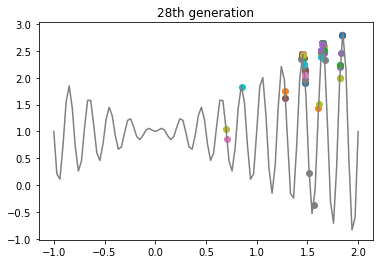

함수의 최댓값을 가지는 x :  1.8423197269439697
함수의 최댓값 :  2.7889518297239206
19번째 유전자에서 돌연변이 발생
13번째 유전자에서 돌연변이 발생
14번째 유전자에서 돌연변이 발생
12번째 유전자에서 돌연변이 발생
5번째 유전자에서 돌연변이 발생
4번째 유전자에서 돌연변이 발생
20번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생
6번째 유전자에서 돌연변이 발생
17번째 유전자에서 돌연변이 발생
16번째 유전자에서 돌연변이 발생
11번째 유전자에서 돌연변이 발생
13번째 유전자에서 돌연변이 발생
19번째 유전자에서 돌연변이 발생


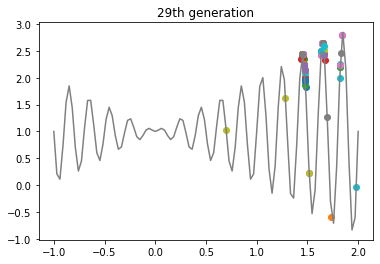

함수의 최댓값을 가지는 x :  1.8423197269439697
함수의 최댓값 :  2.7889518297239206
15번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생
8번째 유전자에서 돌연변이 발생
8번째 유전자에서 돌연변이 발생
18번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
15번째 유전자에서 돌연변이 발생
1번째 유전자에서 돌연변이 발생
0번째 유전자에서 돌연변이 발생
5번째 유전자에서 돌연변이 발생
7번째 유전자에서 돌연변이 발생


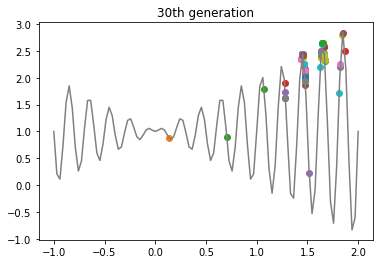

함수의 최댓값을 가지는 x :  1.8540019989013672
함수의 최댓값 :  2.8393680436536073


In [16]:
for j in range(30):
    population = Evolve(population)
    for i in range(len(population)) :
        plt.scatter(get_x(population[i]),fit_func(population[i]))
    plt.plot(x,y,"grey")
    plt.title(f"{j+1}th generation")
    plt.show()
    print("함수의 최댓값을 가지는 x : ", find_max_x(population))
    print("함수의 최댓값 : ", find_max_y(population))
    if is_end(population):
        break